# Lab 3

## Bài **1**

### Đọc dữ liệu từ file babies.txt

In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv('babies.txt', sep=r'\s+', header=0)

df = pd.DataFrame(data)

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1


### Mô tả dữ liệu bằng các giá trị số

#### **Bước 1:** Lọc dữ liệu và tính các đại lượng
*(Cân nặng của trẻ trong trường hợp bà mẹ hút thuốc khi mang thai và cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc khi mang thai)*

In [23]:
# Create filtered DataFrames for smokers and non-smokers
d1 = df[df['smoke'] == 1]  # smokers
d2 = df[df['smoke'] == 0]  # non-smokers

# Define the index for statistical metrics
index = ['mean', 'std', 'min', 'max', 'var', 'median', 
         'Quantile 0%', 'Quantile 25%', 'Quantile 50%', 
         'Quantile 75%', 'IQR', 'skewness', 'kurtosis']

# Get birth weight (bwt) data for smokers
a = d1['bwt']
x = [
    a.mean(), a.std(), a.min(), a.max(), a.var(), a.median(), 
    a.quantile(0), a.quantile(0.25), a.quantile(0.5), a.quantile(0.75), 
    a.quantile(0.75) - a.quantile(0.25),  # IQR
    a.skew(), a.kurt()
]

# Get birth weight (bwt) data for non-smokers
b = d2['bwt']
y = [
    b.mean(), b.std(), b.min(), b.max(), b.var(), b.median(), 
    b.quantile(0), b.quantile(0.25), b.quantile(0.5), b.quantile(0.75), 
    b.quantile(0.75) - b.quantile(0.25),  # IQR
    b.skew(), b.kurt()
]

# Create the result DataFrame
df_result = pd.DataFrame({
    'smoke': x,
    'nonsmoke': y
}, index=index)

df_result


,smoke,nonsmoke
mean,114.109504,123.047170
std,18.098946,17.398689
min,58.000000,55.000000
max,163.000000,176.000000
var,327.571835,302.714371
median,115.000000,123.000000
Quantile 0%,58.000000,55.000000
Quantile 25%,102.000000,113.000000
Quantile 50%,115.000000,123.000000
Quantile 75%,126.000000,134.000000


#### **Bước 2:** Phân tích dữ liệu dựa trên các đại lượng vừa tính.

##### a. Xét tập dữ liệu ứng với trường hợp bà mẹ có hút thuốc

**Vị trí tập trung của dữ liệu:** khoảng giá trị: $114 - 115$

**Tính biến động của dữ liệu:**
- ***Phương sai (variance):*** $var= 327.571835$
- ***Độ lệch chuẩn (std):*** $std= 18.098946$
- ***Khoảng giá trị:*** $min = 58, max = 163 \to range = 105$
- ***Khoảng cách giữa 2 phần tư vị:*** $IQR = Q_3 - Q_1 = 126 - 102 = 24$

**Nhận xét:** Như vậy dữ liệu phân bố gần nhau.
**Hình dạng phân bố của dữ liệu:**
- ***Độ lệch:*** $Skewness= -0.033700$
- ***Độ bè nhọn của đỉnh dữ liệu:*** $Kurtosis= 0.000408$

**Nhận xét:** Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.

##### b. Xét tập dữ liệu ứng với trường hợp bà mẹ không hút thuốc

**Vị trí tập trung của dữ liệu:** khoảng giá trị: $113$

**Tính biến động của dữ liệu:**
- ***Phương sai (variance):*** $var= 302.714371$
- ***Độ lệch chuẩn (std):*** $std= 17.398689$
- ***Khoảng giá trị:*** $min = 55, max = 176 \to range = 121$
- ***Khoảng cách giữa 2 phần tư vị:*** $IQR = Q_3 - Q_1 = 134 - 113 = 21$

**Nhận xét:** Như vậy dữ liệu phân bố gần nhau.
**Hình dạng phân bố của dữ liệu:**
- ***Độ lệch:*** $Skewness=-0.187363$
- ***Độ bè nhọn của đỉnh dữ liệu:*** $Kurtosis=1.052213$

**Nhận xét:** Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.

#### **Bước 3:** So sánh các giá trị thống kê mô tả của hai tập dữ liệu.

**Sự khác biệt về vị trí tập trung dữ liệu:** Chênh lệch khoảng \(123 - 115 = 8\)

**Nhận xét:** Khác biệt không đáng kể.

**Sự khác biệt về tính biến động của dữ liệu được thể hiện qua bảng sau:**

| Thông số      | TH1: Bà mẹ hút thuốc | TH2: Bà mẹ không hút thuốc | Chênh lệch (TH2 - TH1) |
|---------------|----------------------|----------------------------|------------------------|
| Std           | 18.10                | 17.40                      | -0.70                  |
| Var           | 327.57               | 302.71                     | -24.86                 |
| Range         | \(163 - 58 = 105\)   | \(176 - 55 = 121\)         | 16                     |
| IQR           | \(126 - 102 = 24\)   | \(134 - 113 = 21\)         | -3                     |

Dữ liệu trong trường hợp bà mẹ không hút thuốc có phân bố rộng hơn nhưng phần dữ liệu tập trung lại hẹp hơn so với trường hợp bà mẹ có hút thuốc. Sự biến động của dữ liệu trong hai trường hợp không khác biệt nhiều.

**Sự khác biệt về hình dạng phân bố của dữ liệu được thể hiện qua bảng sau:**

| Thông số   | TH1: Bà mẹ hút thuốc   | TH2: Bà mẹ không hút thuốc | Chênh lệch (TH2 - TH1) |
|------------|------------------------|----------------------------|------------------------|
| Skewness   | -0.0336                | -0.1870                    | -0.1534                |
| Kurtosis   | 2.9880                 | 4.0371                     | 1.0490                 |


**$\to$ Nhận xét:** trường hợp bà mẹ hút thuốc có phân bố dữ liệu nhọn hơn, đối xứng hơn so với trường hợp không hút thuốc. Cả 2 trường hợp đều hơi lệch về trái.


### Biểu diễn hình học của dữ liệu

#### Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc

##### Histogram

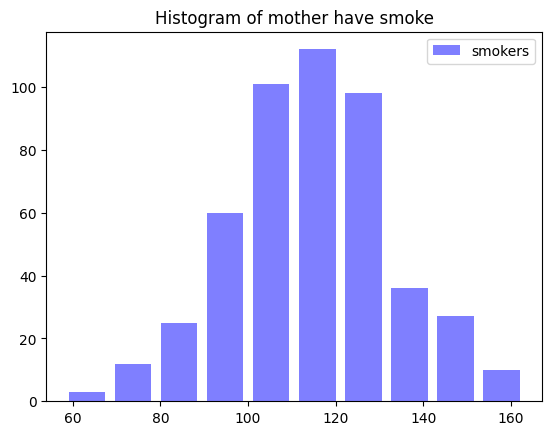

In [31]:
import matplotlib.pyplot as plt

# Create a histogram for birth weight (bwt) data
plt.hist(a, bins=10, alpha=0.5, label='smokers', color='blue', rwidth=0.8)
# plt.hist(b, bins=30, alpha=0.5, label='non-smokers')
plt.legend(loc='upper right')
plt.title('Histogram of mother have smoke')
plt.show()

##### Boxplot

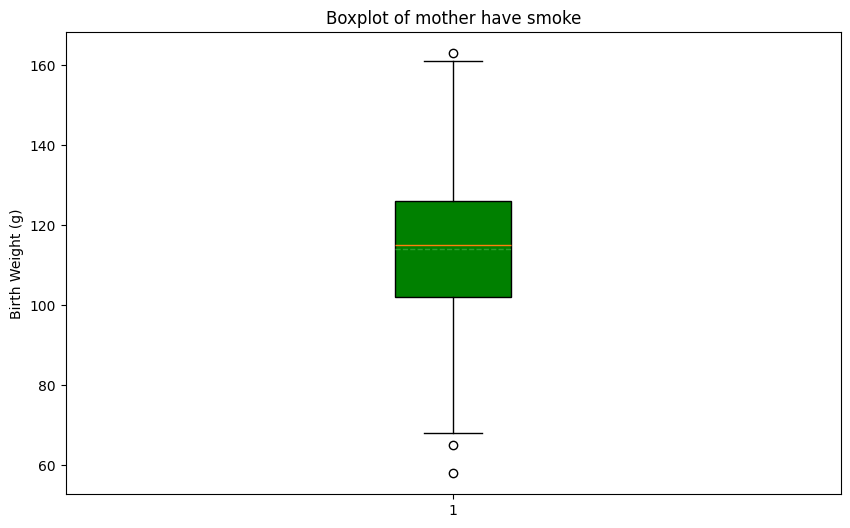

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Create Figure
plt.figure(figsize=(10, 6))

# Create a boxplot for birth weight (bwt) data
plt.boxplot(a, vert=True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='green'))

# Add title and labels
plt.title('Boxplot of mother have smoke')
plt.ylabel('Birth Weight (g)')

# Show the plot
plt.show()


#### Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc

##### Histogram

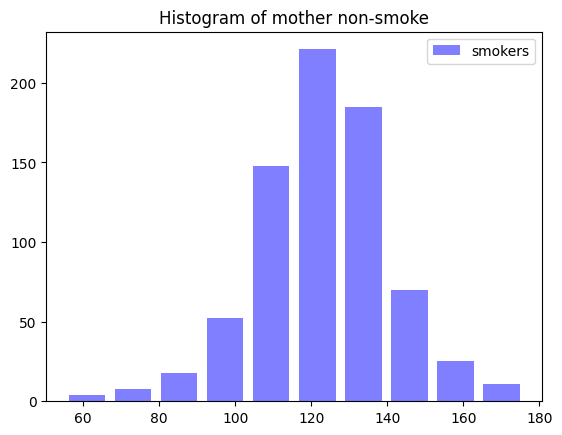

In [39]:
import matplotlib.pyplot as plt

# Create a histogram for birth weight (bwt) data
plt.hist(b, bins=10, alpha=0.5, label='smokers', color='blue', rwidth=0.8)
plt.legend(loc='upper right')
plt.title('Histogram of mother non-smoke')
plt.show()

##### Boxplot

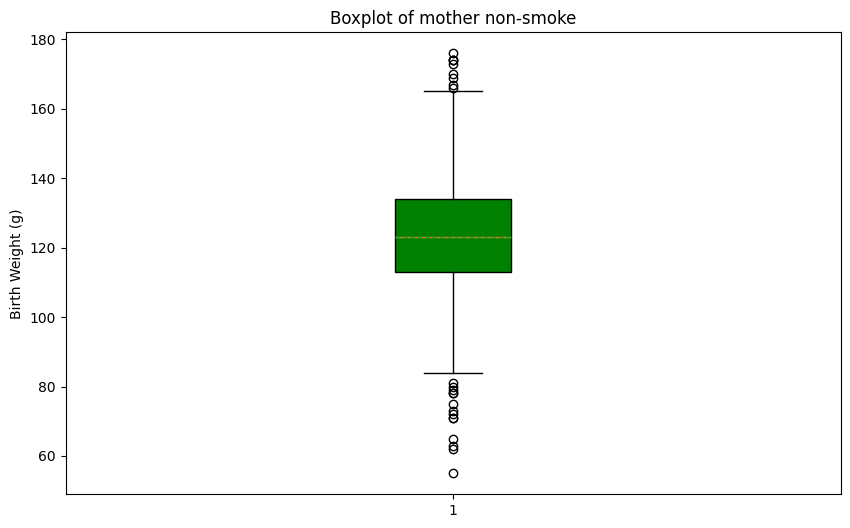

In [42]:
import matplotlib.pyplot as plt

# Create Figure
plt.figure(figsize=(10, 6))

# Create a boxplot for birth weight (bwt) data
plt.boxplot(b, vert=True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='green'))

# Add title and labels
plt.title('Boxplot of mother non-smoke')
plt.ylabel('Birth Weight (g)')

# Show the plot
plt.show()

#### So sánh hai tập dữ liệu dựa vào các biểu diễn hình học

##### Histogram

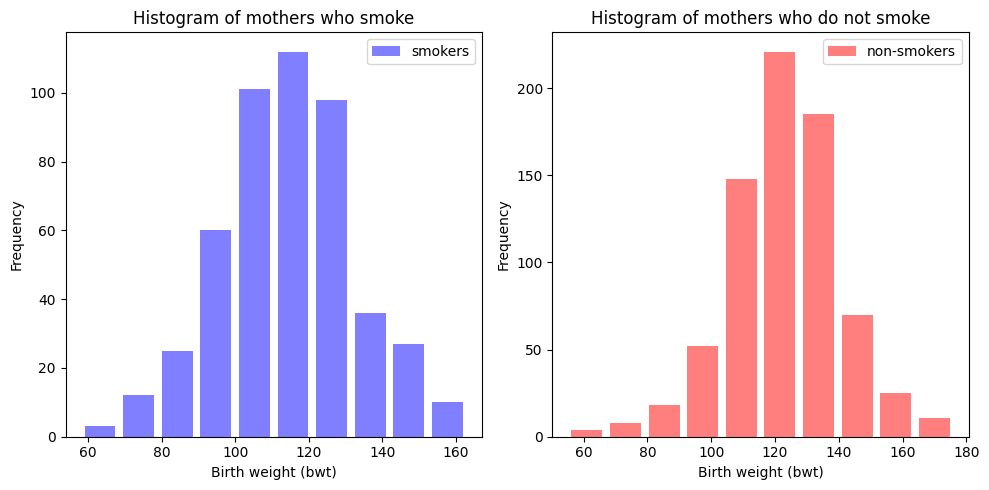

In [44]:
import matplotlib.pyplot as plt

# Create figure and two axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram for birth weight (bwt) data for smokers
ax1.hist(a, bins=10, alpha=0.5, label='smokers', color='blue', rwidth=0.8)
ax1.legend(loc='upper right')
ax1.set_title('Histogram of mothers who smoke')
ax1.set_xlabel('Birth weight (bwt)')
ax1.set_ylabel('Frequency')

# Create a histogram for birth weight (bwt) data for non-smokers
ax2.hist(b, bins=10, alpha=0.5, label='non-smokers', color='red', rwidth=0.8)
ax2.legend(loc='upper right')
ax2.set_title('Histogram of mothers who do not smoke')
ax2.set_xlabel('Birth weight (bwt)')
ax2.set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Cân nặng của trẻ trẻ trong trường hợp bà mẹ không hút thuốc cáo hơn so với trường hợp bà mẹ có hút thuốc**
+ Tính biến thiên của 2 tập dữ liệu: tương tự nhau
+ Tính đối xứng của 2 tập dữ liệu: tương tự nhau
+ Giá trị ngoại lệ: cả 2 đều không có giá trị ngoại lệ đáng chú ý.


##### Boxplot

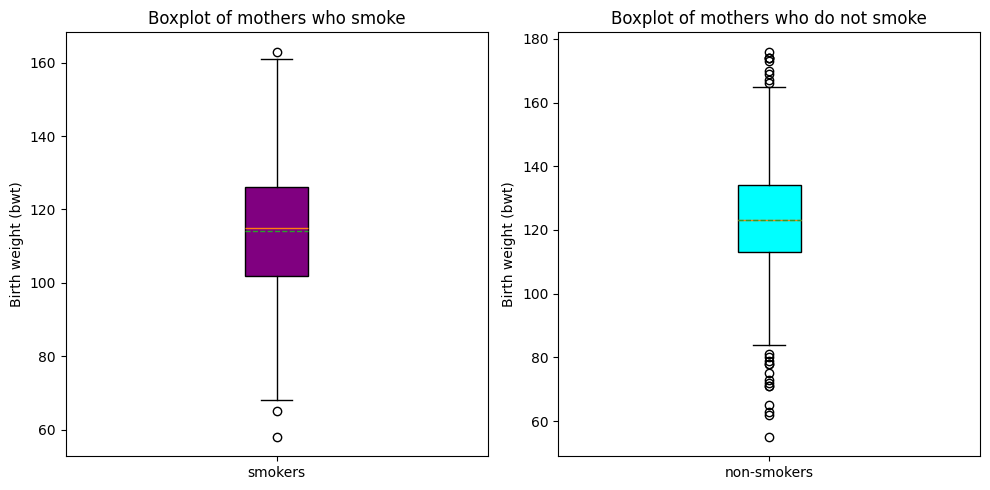

In [48]:
import matplotlib.pyplot as plt

# Create figure and two axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a boxplot for birth weight (bwt) data for smokers
ax1.boxplot(a, vert=True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='purple'))
ax1.set_title('Boxplot of mothers who smoke')
ax1.set_ylabel('Birth weight (bwt)')
ax1.set_xticklabels(['smokers'])

# Create a boxplot for birth weight (bwt) data for non-smokers
ax2.boxplot(b, vert=True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='aqua'))
ax2.set_title('Boxplot of mothers who do not smoke')
ax2.set_ylabel('Birth weight (bwt)')
ax2.set_xticklabels(['non-smokers'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Khác biệt về vị trí:** giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ có hút thuốc (123 và 115).

**Giá trị ngoại lệ:** cả 2 trường hợp đều có giá trị ngoại lệ trên và dưới. Trường hợp không hút thuốc có nhiều giá trị ngoại lệ hơn.


## Bài **2**

### Đọc dữ liệu từ file lungcancer.csv

In [4]:
import pandas as pd

# Load the data
data = pd.read_csv('lungcancer.csv', sep=",", header=0)

# add to dataframe
df_lungcancer = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df_lungcancer.head()


,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


### Chia nhóm (Nhóm mắc ung thư và nhóm không mắc ung thư)

In [ ]:
d0 = df_lungcancer[df_lungcancer['Result'] == 0] # Nhóm không mắc ung thư
d1 = df_lungcancer[df_lungcancer['Result'] == 1] # Nhóm mắc ung thư

### 1. Phân tích dữ liệu dựa trên độ tuổi

In [12]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Sử dụng hàm .describe() để tính toán các chỉ số thống kê cơ bản
describe_d0 = d0['Age'].describe()  # Thống kê cho nhóm không mắc ung thư
describe_d1 = d1['Age'].describe()  # Thống kê cho nhóm mắc ung thư

# Tính các giá trị đặc biệt: IQR, Skewness, Kurtosis
iqr_d0 = describe_d0['75%'] - describe_d0['25%']
iqr_d1 = describe_d1['75%'] - describe_d1['25%']

skewness_d0 = skew(d0['Age'])
kurtosis_d0 = kurtosis(d0['Age'], fisher=False)

skewness_d1 = skew(d1['Age'])
kurtosis_d1 = kurtosis(d1['Age'], fisher=False)

# Tạo bảng với các chỉ số tính toán
x = [
    describe_d1['count'],        # count
    describe_d1['min'],          # min
    describe_d1['max'],          # max
    describe_d1['mean'],         # mean
    describe_d1['std'],          # std (độ lệch chuẩn)
    describe_d1['std'] ** 2,     # variance (phương sai)
    describe_d1['50%'],          # median
    describe_d1['min'],          # Quantile 0%
    describe_d1['25%'],          # Quantile 25%
    describe_d1['50%'],          # Quantile 50%
    describe_d1['75%'],          # Quantile 75%
    iqr_d1,                      # IQR (Interquartile Range)
    skewness_d1,                 # Skewness
    kurtosis_d1                  # Kurtosis
]

y = [
    describe_d0['count'],        # count
    describe_d0['min'],          # min
    describe_d0['max'],          # max
    describe_d0['mean'],         # mean
    describe_d0['std'],          # std (độ lệch chuẩn)
    describe_d0['std'] ** 2,     # variance (phương sai)
    describe_d0['50%'],          # median
    describe_d0['min'],          # Quantile 0%
    describe_d0['25%'],          # Quantile 25%
    describe_d0['50%'],          # Quantile 50%
    describe_d0['75%'],          # Quantile 75%
    iqr_d0,                      # IQR (Interquartile Range)
    skewness_d0,                 # Skewness
    kurtosis_d0                  # Kurtosis
]

# Đặt tên cho các chỉ số
index = ['count', 'min', 'max', 'mean', 'std', 'variance', 'median', 
         'Quantile 0%', 'Quantile 25%', 'Quantile 50%', 
         'Quantile 75%', 'IQR', 'Skewness', 'Kurtosis']

# Tạo DataFrame với các chỉ số
df = pd.DataFrame({'Mắc ung thư phổi': x, 'Không mắc ung thư phổi': y}, index=index)

# In kết quả
df


,Mắc ung thư phổi,Không mắc ung thư phổi
count,28.000000,31.000000
min,26.000000,18.000000
max,77.000000,58.000000
mean,53.428571,32.870968
std,15.179002,9.745912
variance,230.402116,94.982796
median,55.000000,33.000000
Quantile 0%,26.000000,18.000000
Quantile 25%,42.750000,25.500000
Quantile 50%,55.000000,33.000000


#### 1.1. Xét tập dữ liệu ứng với trường hợp mắc ung thư phổi


- **Vị trí tập trung của dữ liệu:** 
    + **Khoảng giá trị trung bình**: Từ 53 đến 55

- **Tính biến động của dữ liệu:**
    + **Phương sai (variance)**: 230.402116
    + **Độ lệch chuẩn (standard deviation)**: 15.179002
    + **Khoảng giá trị**: min = 26, max = 77 → **Range** = 51
    + **Khoảng cách giữa hai phần tư vị (IQR)**: $Q_3 - Q_1 = 62.25 - 42.75 = 19.5$

- **Nhận xét:**
    + **Độ lệch chuẩn cao**: Điều này cho thấy các giá trị dữ liệu phân tán xa so với trung bình, phản ánh sự biến động tương đối mạnh trong tập dữ liệu.
    + **Range (51)**: Phạm vi dữ liệu khá rộng, từ giá trị nhỏ nhất đến giá trị lớn nhất cách nhau 51 đơn vị.
    + **IQR (19.5)**: Khoảng cách giữa phần tư thứ nhất (Q1) và phần tư thứ ba (Q3) nhỏ hơn so với Range, điều này chỉ ra rằng phần lớn dữ liệu tập trung trong một khoảng hẹp hơn, dù vẫn có sự biến động.

- **Hình dạng phân bố của dữ liệu:**
    + **Độ lệch (Skewness)**: -0.227926 (Phân bố dữ liệu hơi lệch về phía trái, nhưng gần như đối xứng).
    + **Độ bè nhọn (Kurtosis)**: 2.110163 (Phân bố không quá nhọn, hai bên giảm dần một cách từ từ và vừa phải).

- **Kết luận:**
    + **Dữ liệu hơi lệch về phía trái**, nhưng gần đối xứng, cho thấy sự phân bố không hoàn toàn cân bằng.
    + **Đỉnh phân bố không quá nhọn**, hai bên của đỉnh phân bố giảm dần với tốc độ tương đối đều, phản ánh sự ổn định trong sự phân tán của dữ liệu.


#### 1.2. Xét tập dữ liệu ứng với trường hợp không mắc ung thư phổi

- **Tính biến động của dữ liệu:**
    + **Phương sai (variance):** 94.982796
    + **Độ lệch chuẩn (standard deviation):** 9.745912
    + **Khoảng giá trị (range):** min = 18, max = 58 → range = 40
    + **Khoảng cách giữa hai phần tư vị (IQR):** $Q_3 - Q_1 = 38 - 25.5 = 12.5$

- **Nhận xét:** 
    + **Phân tán thấp:** Dữ liệu không mắc ung thư phổi có xu hướng phân tán thấp hơn, với các giá trị phần lớn nằm gần nhau.

- **Hình dạng phân bố của dữ liệu:**
    + **Độ lệch (Skewness):** 0.565795 (Phân bố hơi lệch về phía phải).
    + **Độ bè nhọn (Kurtosis):** 2.905405 (Phân bố gần giống phân phối chuẩn, với đỉnh rõ ràng và hai bên giảm dần đều đặn).

- **Kết luận:** Dữ liệu trong trường hợp không mắc ung thư phổi hơi lệch về phía phải, với đỉnh phân bố gần giống phân phối chuẩn và hai bên giảm đều đặn.



#### 1.3. So sánh các giá trị thống kê mô tả của hai tập dữ liệu

**Sự khác biệt về tính biến động:**

| Thông số       | TH1: Ung thư phổi | TH2: Không ung thư phổi | Chênh lệch (TH2 - TH1) |
|----------------|-------------------|------------------------|------------------------|
| **Std**        | 15.179002         | 9.745912               | -5.43309               |
| **Var**        | 230.402116        | 94.982796              | -135.419356            |
| **Range**      | 51                | 40                     | -11                    |
| **IQR**        | 19.5              | 12.5                   | -7                     |

**Nhận xét:** **Biến động thấp hơn ở nhóm không mắc ung thư phổi**: Dữ liệu không mắc ung thư phổi có độ lệch chuẩn và phương sai nhỏ hơn đáng kể so với nhóm mắc ung thư phổi. Điều này cho thấy tính ổn định cao hơn và phạm vi hẹp hơn trong nhóm không mắc ung thư.

**Sự khác biệt về hình dạng phân bố:**

| Thông số       | TH1: Ung thư phổi | TH2: Không ung thư phổi | Chênh lệch (TH2 - TH1) |
|----------------|-------------------|------------------------|------------------------|
| **Skewness**   | -0.227926         | 0.565795               | 0.793721               |
| **Kurtosis**   | 2.110163          | 2.905405               | 0.795242               |

**Nhận xét:**
+ **Trường hợp ung thư phổi**: Dữ liệu có độ lệch nhẹ về phía trái, cho thấy có một số người có tuổi cao hơn mức trung bình. Đỉnh phân bố không quá nhọn, phản ánh sự phân bố tương đối đều.
+ **Trường hợp không mắc ung thư phổi**: Dữ liệu có xu hướng lệch về phía phải, với đỉnh nhọn hơn, cho thấy tập trung nhiều giá trị ở gần trung bình và ít trường hợp có tuổi quá cao hoặc quá thấp.


#### 1.4. So sánh hai tập dữ liệu dựa vào các biểu diễn hình học

##### Histogram

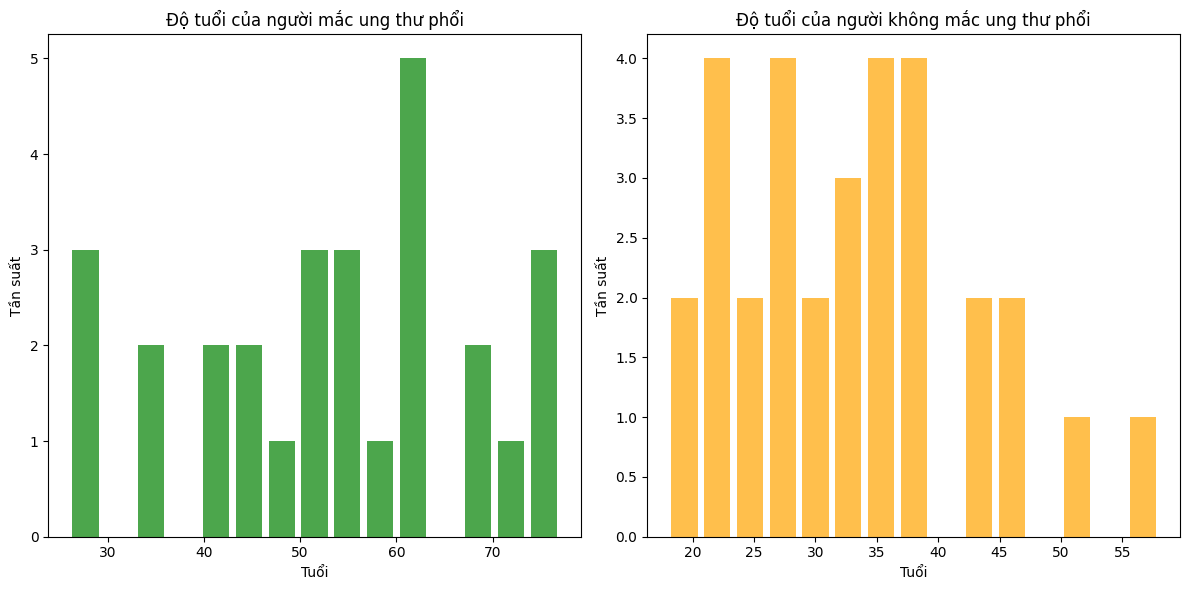

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Định nghĩa chung cho biểu đồ
def plot_histogram(data, title, ax, color):
    ax.hist(data, bins=15, alpha=0.7, color=color, rwidth=0.8)
    ax.set_title(title)
    ax.set_xlabel('Tuổi')
    ax.set_ylabel('Tần suất')

# Vẽ histogram cho hai nhóm
plot_histogram(d1['Age'], 'Độ tuổi của người mắc ung thư phổi', axs[0], 'green')
plot_histogram(d0['Age'], 'Độ tuổi của người không mắc ung thư phổi', axs[1], 'orange')

# Điều chỉnh khoảng cách và hiển thị biểu đồ
plt.tight_layout()
plt.show()


##### Dựa vào histogram, ta có nhận xét sau:

**Độ tuổi:** Người không mắc ung thư phổi có độ tuổi thấp hơn so với người bị mắc ung thư phổi. Điều này cho thấy người có độ tuổi cao, đặc biệt là lứa tuổi trung niên, dễ có nguy cơ mắc bệnh ung thư phổi hơn so với người có lứa tuổi trẻ hơn.

**Tính biến thiên của 2 tập dữ liệu:** Dữ liệu của nhóm mắc ung thư phổi có sự phân tán lớn hơn so với nhóm không mắc. Điều này thể hiện qua các chỉ số như độ lệch chuẩn, phương sai và khoảng giá trị, với các giá trị cao hơn ở nhóm ung thư phổi. Điều này cho thấy độ tuổi của người mắc ung thư phổi có sự đa dạng lớn hơn, với nhiều giá trị cách xa trung bình hơn, trong khi nhóm không mắc ung thư phổi có độ tuổi tập trung nhiều hơn ở các giá trị gần nhau.

**Tính đối xứng của 2 tập dữ liệu:**

- Nhóm mắc ung thư phổi có độ lệch nhẹ về phía trái (Skewness âm), tức là có một số ít giá trị nhỏ hơn trung bình.
- Nhóm không mắc ung thư phổi lại lệch về phía phải (Skewness dương), với một số giá trị lớn hơn trung bình xuất hiện nhiều hơn. Nhìn chung, có sự lệch nhẹ nhưng không đáng kể.

**Giá trị ngoại lệ:** Cả hai tập dữ liệu đều không có giá trị ngoại lệ đáng kể.

##### Boxplot

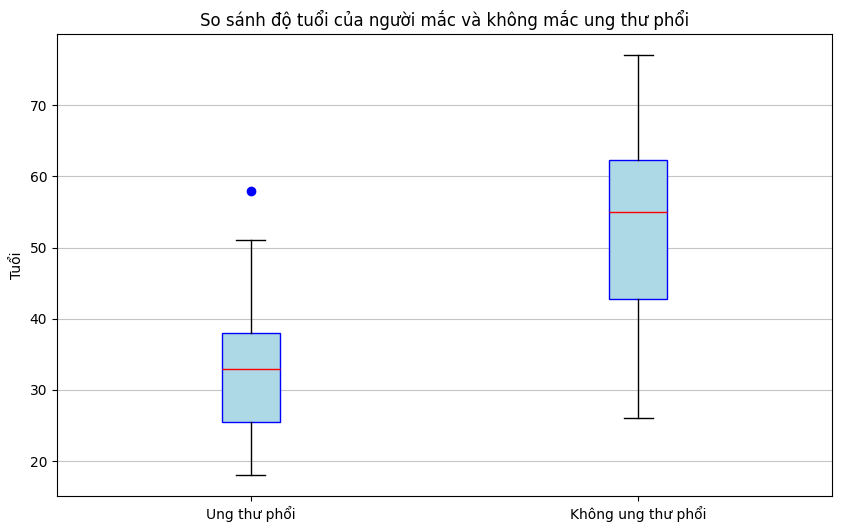

In [16]:
import matplotlib.pyplot as plt

# Tạo biểu đồ boxplot so sánh độ tuổi giữa hai nhóm
plt.figure(figsize=(10, 6))

plt.boxplot([d0['Age'], d1['Age']],
            tick_labels=['Ung thư phổi', 'Không ung thư phổi'],
            patch_artist=True,
            medianprops={'color': 'red'},
            boxprops={'facecolor': 'lightblue', 'edgecolor': 'blue', 'linewidth': 1},
            whiskerprops={'linewidth': 1},
            capprops={'linewidth': 1},
            flierprops={'markerfacecolor': 'blue', 'markeredgecolor': 'blue'},
            notch=False)

# Thêm tiêu đề và nhãn
plt.title('So sánh độ tuổi của người mắc và không mắc ung thư phổi')
plt.ylabel('Tuổi')

# Hiển thị lưới nhẹ theo trục y
plt.grid(axis='y', alpha=0.75)

# Hiển thị biểu đồ
plt.show()


##### Dựa vào Boxplot, ta có nhận xét như sau
**Khác biệt về vị trí trung vị**
- **Độ tuổi trung vị:**
  - Người mắc ung thư phổi: **55 tuổi**
  - Người không mắc ung thư phổi: **33 tuổi**

Như vậy, độ tuổi trung vị của người mắc ung thư phổi cao hơn nhiều so với người không mắc, cho thấy rằng những người lớn tuổi có nguy cơ mắc ung thư phổi cao hơn.

**Giá trị ngoại lệ**
- **Người mắc ung thư phổi:** Không có **giá trị ngoại lệ** đáng kể.
- **Người không mắc ung thư phổi:** Có **một giá trị ngoại lệ** là **58 tuổi**.

Điều này cho thấy rằng trong nhóm không mắc ung thư phổi, có một trường hợp ngoại lệ với độ tuổi cao hơn hẳn so với phần lớn các giá trị khác trong tập dữ liệu.

### 2. Phân tích dữ liệu dựa trên số lượng điếu thuốc lá đã hút

In [17]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Sử dụng hàm .describe() để tính toán các chỉ số thống kê cơ bản
describe_d0 = d0['Smokes'].describe()  # Thống kê cho nhóm không mắc ung thư
describe_d1 = d1['Smokes'].describe()  # Thống kê cho nhóm mắc ung thư

# Tính các giá trị đặc biệt: IQR, Skewness, Kurtosis
iqr_d0 = describe_d0['75%'] - describe_d0['25%']
iqr_d1 = describe_d1['75%'] - describe_d1['25%']

skewness_d0 = skew(d0['Smokes'])
kurtosis_d0 = kurtosis(d0['Smokes'], fisher=False)

skewness_d1 = skew(d1['Smokes'])
kurtosis_d1 = kurtosis(d1['Smokes'], fisher=False)

# Tạo bảng với các chỉ số tính toán
x = [
    describe_d1['count'],        # count
    describe_d1['min'],          # min
    describe_d1['max'],          # max
    describe_d1['mean'],         # mean
    describe_d1['std'],          # std (độ lệch chuẩn)
    describe_d1['std'] ** 2,     # variance (phương sai)
    describe_d1['50%'],          # median
    describe_d1['min'],          # Quantile 0%
    describe_d1['25%'],          # Quantile 25%
    describe_d1['50%'],          # Quantile 50%
    describe_d1['75%'],          # Quantile 75%
    iqr_d1,                      # IQR (Interquartile Range)
    skewness_d1,                 # Skewness
    kurtosis_d1                  # Kurtosis
]

y = [
    describe_d0['count'],        # count
    describe_d0['min'],          # min
    describe_d0['max'],          # max
    describe_d0['mean'],         # mean
    describe_d0['std'],          # std (độ lệch chuẩn)
    describe_d0['std'] ** 2,     # variance (phương sai)
    describe_d0['50%'],          # median
    describe_d0['min'],          # Quantile 0%
    describe_d0['25%'],          # Quantile 25%
    describe_d0['50%'],          # Quantile 50%
    describe_d0['75%'],          # Quantile 75%
    iqr_d0,                      # IQR (Interquartile Range)
    skewness_d0,                 # Skewness
    kurtosis_d0                  # Kurtosis
]

# Đặt tên cho các chỉ số
index = ['count', 'min', 'max', 'mean', 'std', 'variance', 'median', 
         'Quantile 0%', 'Quantile 25%', 'Quantile 50%', 
         'Quantile 75%', 'IQR', 'Skewness', 'Kurtosis']

# Tạo DataFrame với các chỉ số
df = pd.DataFrame({'Mắc ung thư phổi': x, 'Không mắc ung thư phổi': y}, index=index)

# In kết quả
df


,Mắc ung thư phổi,Không mắc ung thư phổi
count,28.000000,31.000000
min,3.000000,0.000000
max,34.000000,25.000000
mean,18.178571,12.258065
std,7.746223,7.215575
variance,60.003968,52.064516
median,20.000000,12.000000
Quantile 0%,3.000000,0.000000
Quantile 25%,15.000000,9.000000
Quantile 50%,20.000000,12.000000


#### 2.1. Xét tập dữ liệu số lượng điếu thuốc hút trong trường hợp mắc ung thư phổi

**Vị trí tập trung của dữ liệu:**
- **Khoảng giá trị:** Từ 18 đến 20 điếu thuốc.

**Tính biến động của dữ liệu:**
- **Phương sai (variance):** 60.003968  
- **Độ lệch chuẩn (standard deviation):** 7.74622  
- **Khoảng giá trị (range):** min = 3, max = 34 → range = 31
- **Khoảng cách giữa 2 phần tư vị (IQR):** Q_3 - Q_1 = 20 - 15 = 5

**Nhận xét:**
Dữ liệu có khoảng giá trị tương đối lớn (từ 3 đến 34 điếu thuốc). Tuy nhiên, phần lớn dữ liệu tập trung trong khoảng hẹp (IQR = 5). Độ lệch chuẩn ở mức vừa phải (7.74622), cho thấy các giá trị phân tán không quá lớn xung quanh trung bình. Phương sai trung bình phản ánh mức độ biến động vừa phải. Do đó, dữ liệu có xu hướng tập trung ở mức độ nhất định, với một số giá trị nằm ngoài biên nhưng không quá phân tán.

**Hình dạng phân bố của dữ liệu:**
- **Độ lệch (Skewness):** -0.387962  
- **Độ bè nhọn (Kurtosis):** 3.072403  

**Nhận xét:**
Dữ liệu có độ lệch về phía trái (Skewness = -0.387962), tức là có nhiều giá trị thấp hơn trung bình. Độ bè nhọn (Kurtosis = 3.072403) cho thấy đỉnh dữ liệu tương đối nhọn hơn phân bố chuẩn, với các giá trị giảm nhanh hai bên, nhưng vẫn có một số giá trị thấp hơn trung bình.


#### 2.2. Xét tập dữ liệu số lượng điếu thuốc hút trong trường hợp không mắc ung thư phổi

**Tính biến động của dữ liệu:**
- **Phương sai (variance):** 52.064516  
- **Độ lệch chuẩn (standard deviation):** 7.215575  
- **Khoảng giá trị (range):** min = 0, max = 25 → range = 25
- **Khoảng cách giữa 2 phần tư vị (IQR):** Q3 - Q1 = 19 - 9 = 10

**Nhận xét:**
Dữ liệu tập trung chủ yếu trong khoảng từ 9 đến 19 điếu thuốc. Phần lớn giá trị nằm trong khoảng giữa với IQR = 10. Độ lệch chuẩn và phương sai ở mức vừa phải, cho thấy mức độ biến động không quá lớn. Tuy nhiên, với range = 25, vẫn có sự chênh lệch giữa giá trị nhỏ nhất và lớn nhất.

**Hình dạng phân bố của dữ liệu:**
- **Độ lệch (Skewness):** -0.142489  
- **Độ bè nhọn (Kurtosis):** 2.201710  

**Nhận xét:**
Dữ liệu hơi lệch về phía trái và có đỉnh tương đối nhọn, cho thấy phần lớn các giá trị tập trung ở khoảng trung bình, với một số giá trị thấp hơn. Dữ liệu không hoàn toàn đối xứng nhưng vẫn gần với phân bố chuẩn.


#### 2.3. So sánh các giá trị thống kê mô tả của hai tập dữ liệu


**Nhận xét:** Sự khác biệt giữa hai tập dữ liệu không quá lớn, nhưng có một số điểm đáng chú ý.

**Sự khác biệt về tính biến động của dữ liệu:**

| Thông số | TH1: Ung thư phổi | TH2: Không ung thư phổi | Chênh lệch (TH2 - TH1) |
|----------|-------------------|------------------------|------------------------|
| **Std**  | 7.74622           | 7.215575               | -0.530645              |
| **Var**  | 60.003968         | 52.064516              | -7.939452              |
| **Range**| 31                | 25                     | -6                     |
| **IQR**  | 5                 | 10                     | 5                      |

**Nhận xét:**
Dữ liệu trong trường hợp không mắc ung thư phổi có phạm vi hẹp hơn (range = 25) và biến động thấp hơn so với nhóm ung thư phổi. Tuy nhiên, IQR trong trường hợp không mắc ung thư lớn hơn, cho thấy dữ liệu tập trung rộng hơn trong khoảng giữa.

**Sự khác biệt về hình dạng phân bố của dữ liệu:**

| Thông số | TH1: Ung thư phổi | TH2: Không ung thư phổi | Chênh lệch (TH2 - TH1) |
|----------|-------------------|------------------------|------------------------|
| **Skewness** | -0.387962       | -0.142489              | 0.245203               |
| **Kurtosis** | 3.072403        | 2.201710               | -0.870693              |

**Nhận xét:**
Nhóm mắc ung thư phổi có độ lệch về trái mạnh hơn và đỉnh dữ liệu cao hơn so với nhóm không mắc ung thư. Điều này phản ánh tính chất phân tán lớn hơn của dữ liệu trong nhóm mắc ung thư phổi, trong khi nhóm không mắc ung thư phổi có sự tập trung rõ ràng hơn gần trung bình.

#### 2.4. So sánh hai tập dữ liệu dựa vào các biểu diễn hình học

##### Histogram

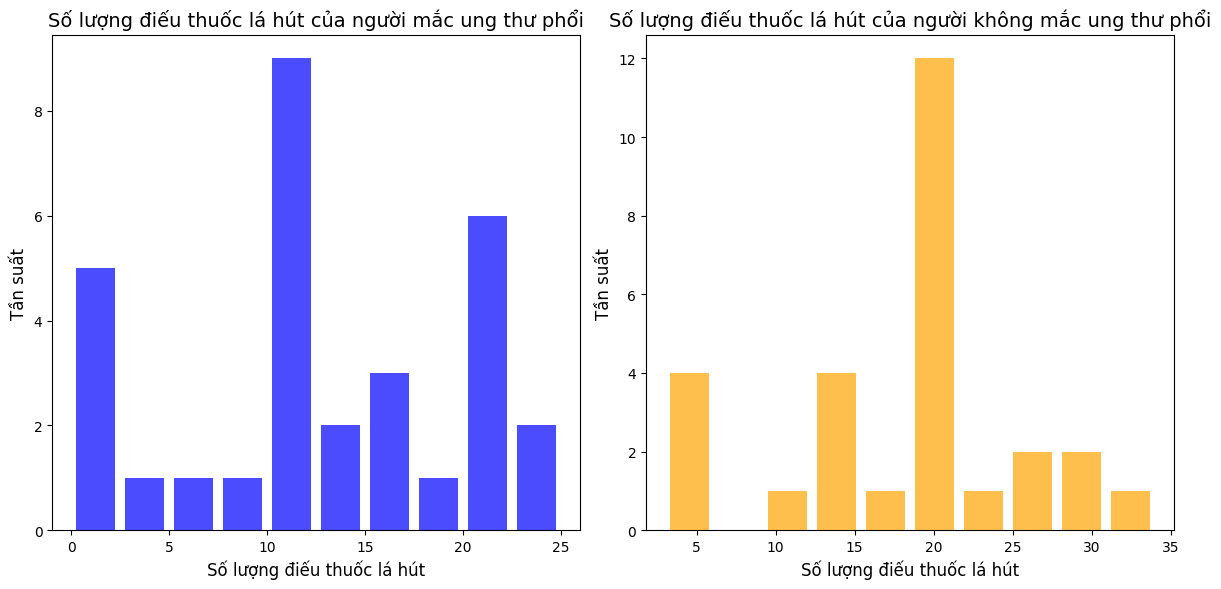

In [19]:
# Biểu diễn hình học bằng đồ thị histogram
import matplotlib.pyplot as plt

# Tạo đối tượng figure và axes với 2 biểu đồ nằm ngang cạnh nhau
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram cho nhóm mắc ung thư phổi
axs[0].hist(d0['Smokes'], bins=10, alpha=0.7, color='blue', rwidth=0.8)
axs[0].set_title('Số lượng điếu thuốc lá hút của người mắc ung thư phổi', fontsize=14)
axs[0].set_xlabel('Số lượng điếu thuốc lá hút', fontsize=12)
axs[0].set_ylabel('Tần suất', fontsize=12)

# Histogram cho nhóm không mắc ung thư phổi
axs[1].hist(d1['Smokes'], bins=10, alpha=0.7, color='orange', rwidth=0.8)
axs[1].set_title('Số lượng điếu thuốc lá hút của người không mắc ung thư phổi', fontsize=14)
axs[1].set_xlabel('Số lượng điếu thuốc lá hút', fontsize=12)
axs[1].set_ylabel('Tần suất', fontsize=12)

# Điều chỉnh layout để tránh chồng lấn các thành phần
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


##### Dựa vào Histogram, ta có nhận xét như sau

**Tính biến thiên của hai tập dữ liệu:** Cả hai tập dữ liệu đều có mức độ biến thiên tương đối tương đồng. Cụ thể, phương sai và độ lệch chuẩn của nhóm **ung thư phổi** lần lượt là \( \text{var} = 60.003968 \) và \( \text{std} = 7.746223 \), trong khi của nhóm **không ung thư phổi** là \( \text{var} = 52.064516 \) và \( \text{std} = 7.215575 \). Điều này cho thấy mức độ phân tán của cả hai tập dữ liệu là tương đương, với sự khác biệt không đáng kể.

**Tính đối xứng của hai tập dữ liệu:** Tính đối xứng của hai tập dữ liệu cũng khá tương đồng. Độ lệch (Skewness) của tập **ung thư phổi** là \( -0.387962 \), trong khi của tập **không ung thư phổi** là \( -0.142489 \). Cả hai đều cho thấy có độ lệch nhẹ về phía trái. Về độ nhọn của đỉnh (Kurtosis), nhóm **ung thư phổi** có giá trị là \( 3.072403 \), trong khi nhóm **không ung thư phổi** có giá trị là \( 2.201710 \). Điều này chỉ ra rằng phần lớn giá trị trong cả hai nhóm đều tập trung gần trung bình.

**Giá trị ngoại lệ:** Cả hai tập dữ liệu đều không có giá trị ngoại lệ đáng chú ý. Tất cả các giá trị nằm trong phạm vi hợp lý, không có sự xuất hiện của các giá trị cực kỳ bất thường, cho thấy tính ổn định và đồng nhất của dữ liệu.

##### Boxplot

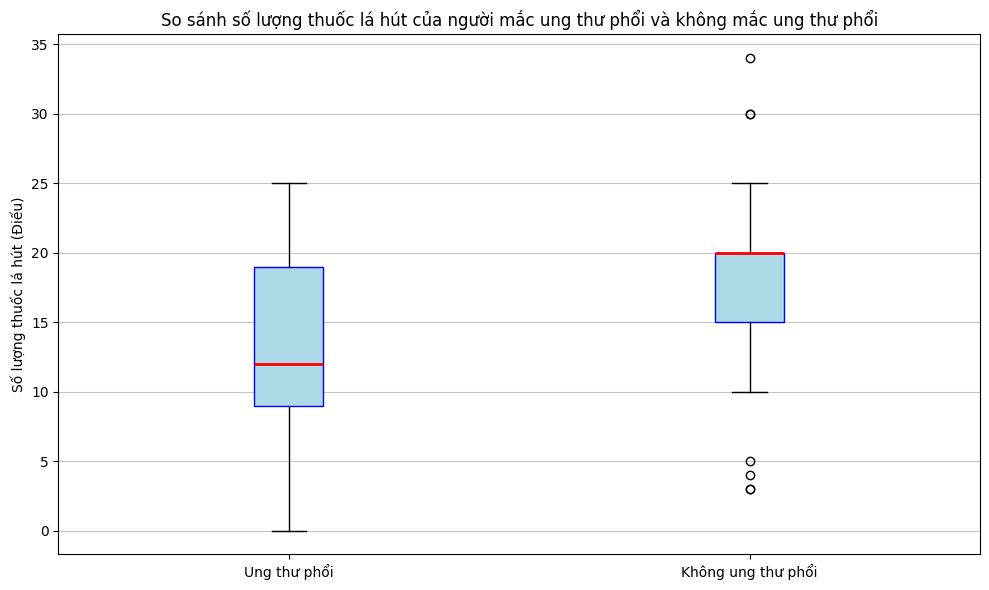

In [20]:
import matplotlib.pyplot as plt

# Tạo dữ liệu cho boxplot
data = [d0['Smokes'], d1['Smokes']]
labels = ['Ung thư phổi', 'Không ung thư phổi']

# Vẽ boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', edgecolor='blue', linewidth=1),  # Màu nền và màu viền
            medianprops=dict(color='red', linewidth=2))

# Thêm tiêu đề và nhãn
plt.title('So sánh số lượng thuốc lá hút của người mắc ung thư phổi và không mắc ung thư phổi')
plt.ylabel('Số lượng thuốc lá hút (Điếu)')

# Thiết lập nhãn cho trục x
plt.xticks(ticks=[1, 2], labels=labels)

# Thêm lưới cho biểu đồ
plt.grid(axis='y', alpha=0.75)

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo các thành phần không bị chồng chéo
plt.show()


#### Dựa vào Boxplot, ta có phân phối số lượng thuốc lá hút giữa hai đối tượng

**Phân phối số lượng thuốc lá hút**

- **Ung thư phổi:**
  - **Phân phối:** Số lượng thuốc lá hút dao động từ **3 đến 34** điếu.
  - **Tập trung:** Phần lớn các giá trị tập trung quanh khoảng **15-20** điếu.

- **Không ung thư phổi:**
  - **Phân phối:** Số lượng thuốc lá hút dao động từ **0 đến 25** điếu.
  - **Tập trung:** Phần lớn các giá trị tập trung quanh khoảng **9-12** điếu.

**Nhận xét về nguy cơ mắc bệnh**
  - Giá trị tập trung quanh **9-12** điếu cho thấy rằng những người hút ít điếu thuốc sẽ có **nguy cơ mắc bệnh ung thư phổi thấp hơn**.

**Khác biệt về vị trí**
  - **Giá trị trung vị:**
    - Người mắc bệnh ung thư phổi: **20 điếu**
    - Người không mắc bệnh ung thư phổi: **12 điếu**

Như vậy, giá trị trung vị của người mắc bệnh ung thư phổi lớn hơn so với người không mắc bệnh, cho thấy rằng người mắc bệnh có xu hướng hút thuốc nhiều hơn.

**Giá trị ngoại lệ:** Người mắc bệnh ung thư phổi có nhiều **giá trị ngoại lệ hơn** so với người không mắc bệnh ung thư, điều này có thể phản ánh sự đa dạng trong hành vi hút thuốc và nguy cơ mắc bệnh.

### 3. Phân tích dữ liệu dựa trên chất lượng môi trường sống

In [21]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Sử dụng hàm .describe() để tính toán các chỉ số thống kê cơ bản
describe_d0 = d0['AreaQ'].describe()  # Thống kê cho nhóm không mắc ung thư
describe_d1 = d1['AreaQ'].describe()  # Thống kê cho nhóm mắc ung thư

# Tính các giá trị đặc biệt: IQR, Skewness, Kurtosis
iqr_d0 = describe_d0['75%'] - describe_d0['25%']
iqr_d1 = describe_d1['75%'] - describe_d1['25%']

skewness_d0 = skew(d0['AreaQ'])
kurtosis_d0 = kurtosis(d0['AreaQ'], fisher=False)

skewness_d1 = skew(d1['AreaQ'])
kurtosis_d1 = kurtosis(d1['AreaQ'], fisher=False)

# Tạo bảng với các chỉ số tính toán
x = [
    describe_d1['count'],        # count
    describe_d1['min'],          # min
    describe_d1['max'],          # max
    describe_d1['mean'],         # mean
    describe_d1['std'],          # std (độ lệch chuẩn)
    describe_d1['std'] ** 2,     # variance (phương sai)
    describe_d1['50%'],          # median
    describe_d1['min'],          # Quantile 0%
    describe_d1['25%'],          # Quantile 25%
    describe_d1['50%'],          # Quantile 50%
    describe_d1['75%'],          # Quantile 75%
    iqr_d1,                      # IQR (Interquartile Range)
    skewness_d1,                 # Skewness
    kurtosis_d1                  # Kurtosis
]

y = [
    describe_d0['count'],        # count
    describe_d0['min'],          # min
    describe_d0['max'],          # max
    describe_d0['mean'],         # mean
    describe_d0['std'],          # std (độ lệch chuẩn)
    describe_d0['std'] ** 2,     # variance (phương sai)
    describe_d0['50%'],          # median
    describe_d0['min'],          # Quantile 0%
    describe_d0['25%'],          # Quantile 25%
    describe_d0['50%'],          # Quantile 50%
    describe_d0['75%'],          # Quantile 75%
    iqr_d0,                      # IQR (Interquartile Range)
    skewness_d0,                 # Skewness
    kurtosis_d0                  # Kurtosis
]

# Đặt tên cho các chỉ số
index = ['count', 'min', 'max', 'mean', 'std', 'variance', 'median', 
         'Quantile 0%', 'Quantile 25%', 'Quantile 50%', 
         'Quantile 75%', 'IQR', 'Skewness', 'Kurtosis']

# Tạo DataFrame với các chỉ số
df = pd.DataFrame({'Mắc ung thư phổi': x, 'Không mắc ung thư phổi': y}, index=index)

# In kết quả
df


,Mắc ung thư phổi,Không mắc ung thư phổi
count,28.000000,31.000000
min,1.000000,4.000000
max,7.000000,10.000000
mean,3.285714,6.935484
std,1.674584,1.631676
variance,2.804233,2.662366
median,3.000000,7.000000
Quantile 0%,1.000000,4.000000
Quantile 25%,2.000000,5.500000
Quantile 50%,3.000000,7.000000


#### 3.1. Xét tập dữ liệu chất lượng môi trường sống của người mắc bệnh ung thư phổi

**Tính biến động của dữ liệu:**
- **Phương sai (variance):** var = 2.804233
- **Độ lệch chuẩn (standard deviation):** std = 1.674584
- **Khoảng giá trị:** min = 1, max = 7 → range = 7 - 1 = 6
- **Khoảng cách giữa 2 phần tư vị:** IQR = Q3 - Q1 = 5 - 2 = 3

**Nhận xét:**
Dữ liệu có khoảng giá trị không quá lớn, với các giá trị dao động từ 1 đến 7. Phần lớn dữ liệu tập trung trong khoảng từ 2 đến 5 (IQR = 3), cho thấy sự tập trung vừa phải. Độ lệch chuẩn ở mức tương đối nhỏ (1.674584), thể hiện mức độ phân tán quanh giá trị trung bình là thấp. Phương sai cũng nhỏ (2.804233), cho thấy sự biến động không lớn.

**Hình dạng phân bố của dữ liệu:**
- **Độ lệch:** Skewness = 0.260623
- **Độ bè nhọn của đỉnh dữ liệu:** Kurtosis = 2.186429

**Nhận xét:**  
Dữ liệu có độ lệch dương nhẹ (Skewness = 0.260623), cho thấy có một số giá trị cao hơn trung bình, nhưng sự lệch không quá mạnh. Độ bè nhọn của đỉnh dữ liệu (Kurtosis = 2.186429) cho thấy đỉnh dữ liệu hơi nhọn, và phần lớn dữ liệu nằm gần trung tâm.

#### 3.2. Xét tập dữ liệu chất lượng môi trường sống của người không mắc bệnh ung thư phổi

**Tính biến động của dữ liệu:**
- **Phương sai (variance):** var = 2.662366
- **Độ lệch chuẩn (standard deviation):** std = 1.631676
- **Khoảng giá trị:** min = 4, max = 10 → range = 10 - 4 = 6
- **Khoảng cách giữa 2 phần tư vị:** IQR = Q3 - Q1 = 8 - 5.5 = 2.5

**Nhận xét:**
Dữ liệu có khoảng giá trị tương tự như trường hợp ung thư phổi (range = 6), với phần lớn giá trị tập trung trong khoảng 5.5 đến 8 (IQR = 2.5). Sự phân tán của dữ liệu thấp, với độ lệch chuẩn (1.631676) và phương sai (2.662366) tương đối nhỏ, thể hiện dữ liệu tập trung khá chặt chẽ.

**Hình dạng phân bố của dữ liệu:**
- **Độ lệch:** Skewness = 0.058245
- **Độ bè nhọn của đỉnh dữ liệu:** Kurtosis = 1.962871

**Nhận xét:**  
Độ lệch (Skewness = 0.058245) gần như bằng 0, cho thấy dữ liệu phân bố khá đối xứng. Độ bè nhọn (Kurtosis = 1.962871) thấp hơn so với trường hợp ung thư phổi, thể hiện đỉnh của phân bố thấp và dữ liệu ít tập trung gần trung tâm hơn.

#### 3.3. So sánh các giá trị thống kê mô tả của hai tập dữ liệu

| Thông số         | TH1: Ung thư phổi | TH2: Không ung thư phổi | Chênh lệch (TH2 - TH1) |
|------------------|-------------------|-------------------------|------------------------|
| Std              | 1.674584          | 1.631676                | -0.042908              |
| Var              | 2.804233          | 2.662366                | -0.141867              |
| Range            | 6                 | 6                       | 0                      |
| IQR              | 3                 | 2.5                     | -0.5                   |

**Nhận xét:**
Sự biến động của dữ liệu trong hai trường hợp không khác biệt nhiều. Tuy nhiên, dữ liệu của nhóm không mắc bệnh ung thư phổi có xu hướng tập trung chặt chẽ hơn, với IQR nhỏ hơn so với nhóm mắc bệnh.

#### 3.4. Sự khác biệt về hình dạng phân bố của dữ liệu

| Thông số  | TH1: Ung thư phổi | TH2: Không ung thư phổi | Chênh lệch (TH2 - TH1) |
|-----------|-------------------|-------------------------|------------------------|
| Skewness  | 0.260623          | 0.058245                | -0.202378              |
| Kurtosis  | 2.186429          | 1.962871                | -0.223558              |

**Nhận xét:**  
Dữ liệu của nhóm không mắc bệnh ung thư phổi có phân bố đối xứng hơn và đỉnh ít nhọn hơn so với nhóm mắc bệnh ung thư phổi.

#### 3.5. So sánh hai tập dữ liệu dựa vào các biểu diễn hình học

##### Histogram

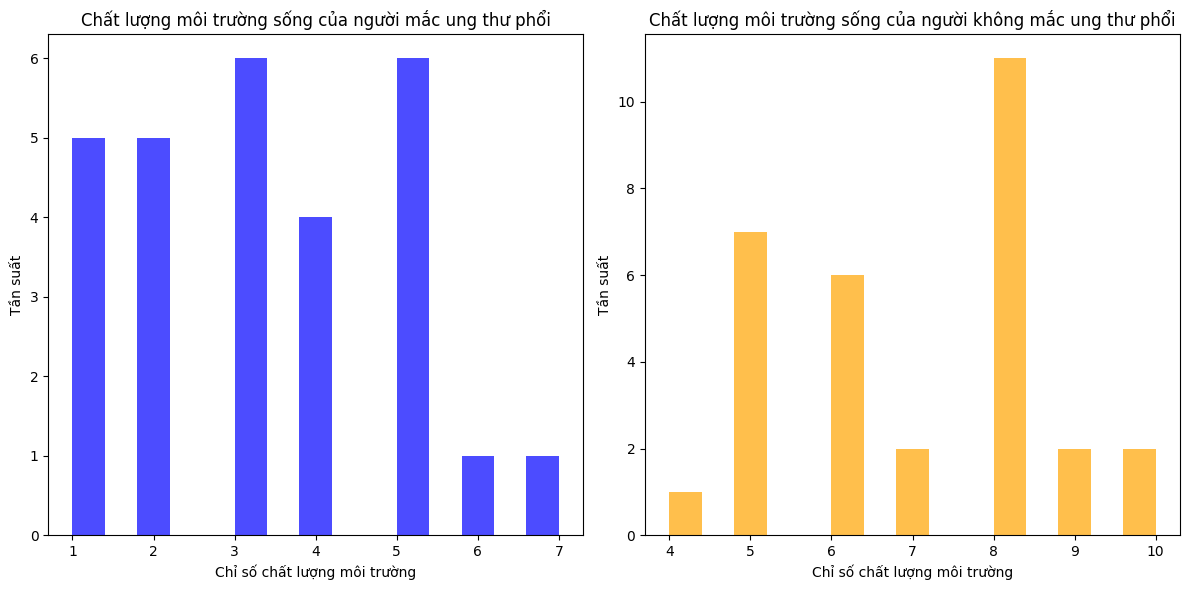

In [22]:
# Biểu diễn hình học bằng histogram
import matplotlib.pyplot as plt

# Tạo đối tượng figure và axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Danh sách các nhóm và màu sắc
groups = [
    (d1['AreaQ'], 'blue', 'Ung thư phổi', 'Chất lượng môi trường sống của người mắc ung thư phổi'),
    (d0['AreaQ'], 'orange', 'Không ung thư phổi', 'Chất lượng môi trường sống của người không mắc ung thư phổi')
]

# Vẽ histogram cho từng nhóm
for ax, (data, color, label, title) in zip(axs, groups):
    ax.hist(data, bins=15, alpha=0.7, color=color, label=label)
    ax.set_title(title)
    ax.set_xlabel('Chỉ số chất lượng môi trường')
    ax.set_ylabel('Tần suất')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lấn
plt.show()


**Dựa vào Histogram, ta có nhận xét:**
- **Tính biến thiên của 2 tập dữ liệu:** Cả hai tập dữ liệu có mức độ biến thiên tương đương nhau, mặc dù có sự chênh lệch nhẹ. Cụ thể, phương sai và độ lệch chuẩn của nhóm **ung thư phổi** (var = 2.804233, std = 1.674584) và nhóm **không ung thư phổi** (var = 2.662366, std = 1.631676) đều cho thấy mức độ phân tán của dữ liệu ở cả hai nhóm không quá khác biệt. Tính chất biến thiên giữa hai tập là tương tự nhau với sự phân tán vừa phải.

**Tính đối xứng của 2 tập dữ liệu:** Cả hai tập dữ liệu đều có tính đối xứng khá giống nhau. Độ lệch (Skewness) của nhóm **ung thư phổi** là 0.260623 và của nhóm **không ung thư phổi** là 0.058245. Cả hai tập đều có độ lệch dương nhẹ, cho thấy phần lớn giá trị tập trung ở bên trái của phân phối, nhưng mức độ lệch này không đáng kể. Về độ nhọn của đỉnh (Kurtosis), giá trị của nhóm **ung thư phổi** là 2.186429 và của nhóm **không ung thư phổi** là 1.962871, chỉ ra rằng phân phối của cả hai tập đều không quá nhọn, với phần lớn giá trị tập trung quanh trung bình.

**Giá trị ngoại lệ:** Cả hai tập dữ liệu đều không có giá trị ngoại lệ đáng chú ý.

#### Boxplot

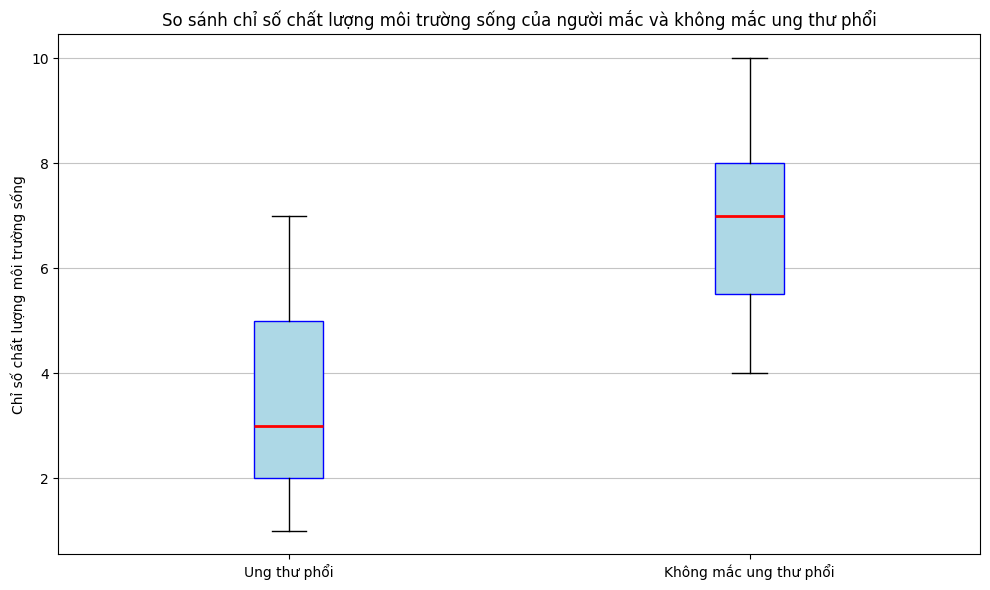

In [23]:
import matplotlib.pyplot as plt

# Tạo boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([d1['AreaQ'], d0['AreaQ']], 
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue', edgecolor='blue', linewidth=1),  # Màu nền và màu viền
            medianprops=dict(color='red', linewidth=2))  # Màu sắc và độ dày của đường giữa boxplot

# Thêm tiêu đề và nhãn
plt.title('So sánh chỉ số chất lượng môi trường sống của người mắc và không mắc ung thư phổi')
plt.ylabel('Chỉ số chất lượng môi trường sống')
plt.xticks([1, 2], ['Ung thư phổi', 'Không mắc ung thư phổi'])  # Thiết lập nhãn cho trục x

# Thêm lưới cho biểu đồ
plt.grid(axis='y', alpha=0.75)

# Hiển thị biểu đồ
plt.tight_layout()  # Tối ưu khoảng cách giữa các phần tử của biểu đồ
plt.show()


**Dựa vào Boxplot, ta có nhận xét:**

**Khác biệt về vị trí:** Giá trị trung vị chất lượng môi trường sống của trường hợp không mắc ung thư phổi lớn hơn so với trường hợp của người mắc ung thư phổi (7 và 3). Điều này cho thấy những người không mắc ung thư phổi có chỉ số chất lượng môi trường sống cao hơn những người mắc ung thư phổi có chỉ số chất lượng môi trường sống thấp hơn.

**Giá trị ngoại lệ:** Cả hai nhóm dữ liệu đều không có giá trị ngoại lệ đáng chú ý.


### 4. Phân tích số liệu dựa trên lượng tiêu thụ rượu

In [24]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Sử dụng hàm .describe() để tính toán các chỉ số thống kê cơ bản
describe_d0 = d0['Alkhol'].describe()  # Thống kê cho nhóm không mắc ung thư
describe_d1 = d1['Alkhol'].describe()  # Thống kê cho nhóm mắc ung thư

# Tính các giá trị đặc biệt: IQR, Skewness, Kurtosis
iqr_d0 = describe_d0['75%'] - describe_d0['25%']
iqr_d1 = describe_d1['75%'] - describe_d1['25%']

skewness_d0 = skew(d0['Alkhol'])
kurtosis_d0 = kurtosis(d0['Alkhol'], fisher=False)

skewness_d1 = skew(d1['Alkhol'])
kurtosis_d1 = kurtosis(d1['Alkhol'], fisher=False)

# Tạo bảng với các chỉ số tính toán
x = [
    describe_d1['count'],        # count
    describe_d1['min'],          # min
    describe_d1['max'],          # max
    describe_d1['mean'],         # mean
    describe_d1['std'],          # std (độ lệch chuẩn)
    describe_d1['std'] ** 2,     # variance (phương sai)
    describe_d1['50%'],          # median
    describe_d1['min'],          # Quantile 0%
    describe_d1['25%'],          # Quantile 25%
    describe_d1['50%'],          # Quantile 50%
    describe_d1['75%'],          # Quantile 75%
    iqr_d1,                      # IQR (Interquartile Range)
    skewness_d1,                 # Skewness
    kurtosis_d1                  # Kurtosis
]

y = [
    describe_d0['count'],        # count
    describe_d0['min'],          # min
    describe_d0['max'],          # max
    describe_d0['mean'],         # mean
    describe_d0['std'],          # std (độ lệch chuẩn)
    describe_d0['std'] ** 2,     # variance (phương sai)
    describe_d0['50%'],          # median
    describe_d0['min'],          # Quantile 0%
    describe_d0['25%'],          # Quantile 25%
    describe_d0['50%'],          # Quantile 50%
    describe_d0['75%'],          # Quantile 75%
    iqr_d0,                      # IQR (Interquartile Range)
    skewness_d0,                 # Skewness
    kurtosis_d0                  # Kurtosis
]

# Đặt tên cho các chỉ số
index = ['count', 'min', 'max', 'mean', 'std', 'variance', 'median', 
         'Quantile 0%', 'Quantile 25%', 'Quantile 50%', 
         'Quantile 75%', 'IQR', 'Skewness', 'Kurtosis']

# Tạo DataFrame với các chỉ số
df = pd.DataFrame({'Mắc ung thư phổi': x, 'Không mắc ung thư phổi': y}, index=index)

# In kết quả
df


,Mắc ung thư phổi,Không mắc ung thư phổi
count,28.000000,31.000000
min,3.000000,0.000000
max,8.000000,4.000000
mean,5.250000,1.419355
std,1.669442,1.118755
variance,2.787037,1.251613
median,5.000000,1.000000
Quantile 0%,3.000000,0.000000
Quantile 25%,4.000000,0.500000
Quantile 50%,5.000000,1.000000


#### 4.1. Xét tập dữ liệu lượng rượu tiêu thụ của người mắc bệnh ung thư phổi

**Tính biến động của dữ liệu:**
- **Phương sai (variance):** var = 2.787037
- **Độ lệch chuẩn (standard deviation):** std = 1.669442
- **Khoảng giá trị:** min = 3, max = 8 → range = 5
- **Khoảng cách giữa 2 phần tư vị:** IQR = Q3 - Q1 = 6 - 4 = 2

**Nhận xét:**
Dữ liệu cho thấy khoảng giá trị không quá lớn, với các giá trị dao động từ 3 đến 8. Phần lớn các giá trị tập trung trong khoảng từ 4 đến 6 (IQR = 2), cho thấy sự tập trung tương đối. Độ lệch chuẩn (1.669442) và phương sai (2.787037) chỉ ra rằng mức độ phân tán quanh giá trị trung bình là vừa phải.

**Hình dạng phân bố của dữ liệu:**
- **Độ lệch (Skewness):** 0.422538
- **Độ bè nhọn của đỉnh dữ liệu (Kurtosis):** 2.059723

**Nhận xét:**  
Dữ liệu có độ lệch dương nhẹ (Skewness = 0.422538), cho thấy có một số giá trị cao hơn trung bình. Độ bè nhọn của đỉnh dữ liệu (Kurtosis = 2.059723) cho thấy đỉnh hơi nhọn và dữ liệu phân bố gần trung bình.



#### 4.2. Xét tập dữ liệu lượng rượu tiêu thụ của người không mắc bệnh ung thư phổi

**Tính biến động của dữ liệu:**
- **Phương sai (variance):** var = 1.251613
- **Độ lệch chuẩn (standard deviation):** std = 1.118755
- **Khoảng giá trị:** min = 0, max = 4 → range = 4
- **Khoảng cách giữa 2 phần tư vị:** IQR = Q3 - Q1 = 2 - 0.5 = 1.5

**Nhận xét:**
Dữ liệu cho thấy khoảng giá trị nhỏ hơn so với trường hợp ung thư phổi (range = 4). Phần lớn các giá trị tập trung trong khoảng từ 0.5 đến 2 (IQR = 1.5), cho thấy dữ liệu tập trung chặt chẽ hơn. Độ lệch chuẩn (1.118755) và phương sai (1.251613) thấp hơn, thể hiện mức độ phân tán nhỏ hơn so với nhóm ung thư phổi.

**Hình dạng phân bố của dữ liệu:**
- **Độ lệch (Skewness):** 0.277695
- **Độ bè nhọn của đỉnh dữ liệu (Kurtosis):** 2.268528

**Nhận xét:**  
Dữ liệu có độ lệch dương nhẹ (Skewness = 0.277695) nhưng ít hơn so với nhóm ung thư phổi. Đỉnh phân bố cũng hơi nhọn với giá trị Kurtosis là 2.268528.




#### 4.3. So sánh các giá trị thống kê mô tả của hai tập dữ liệu

| Thông số         | TH1: Ung thư phổi | TH2: Không ung thư phổi | Chênh lệch (TH2 - TH1) |
|------------------|-------------------|-------------------------|------------------------|
| **Std**          | 1.669442          | 1.118755                | -0.550687              |
| **Var**          | 2.787037          | 1.251613                | -1.535424              |
| **Range**        | 5                 | 4                       | -1                     |
| **IQR**          | 2                 | 1.5                     | -0.5                   |

**Nhận xét:**
Sự biến động của dữ liệu trong hai trường hợp có sự khác biệt, với nhóm ung thư phổi có phân tán lớn hơn. Dữ liệu của nhóm không mắc bệnh ung thư phổi có xu hướng tập trung chặt chẽ hơn, với IQR và phương sai nhỏ hơn.

#### 4.4. Sự khác biệt về hình dạng phân bố của dữ liệu

| Thông số  | TH1: Ung thư phổi | TH2: Không ung thư phổi | Chênh lệch (TH2 - TH1) |
|-----------|-------------------|-------------------------|------------------------|
| **Skewness**  | 0.422538          | 0.277695                | -0.144843              |
| **Kurtosis**  | 2.059723          | 2.268528                | 0.208805               |

**Nhận xét:**  
Cả hai nhóm đều có độ lệch nhẹ về phía dương, nhưng nhóm ung thư phổi có độ lệch lớn hơn. Độ nhọn của đỉnh dữ liệu trong nhóm không mắc bệnh ung thư phổi cũng cao hơn, mặc dù sự chênh lệch không quá lớn.

#### 4.5. So sánh hai tập dữ liệu dựa vào các biểu diễn hình học

##### Histogram

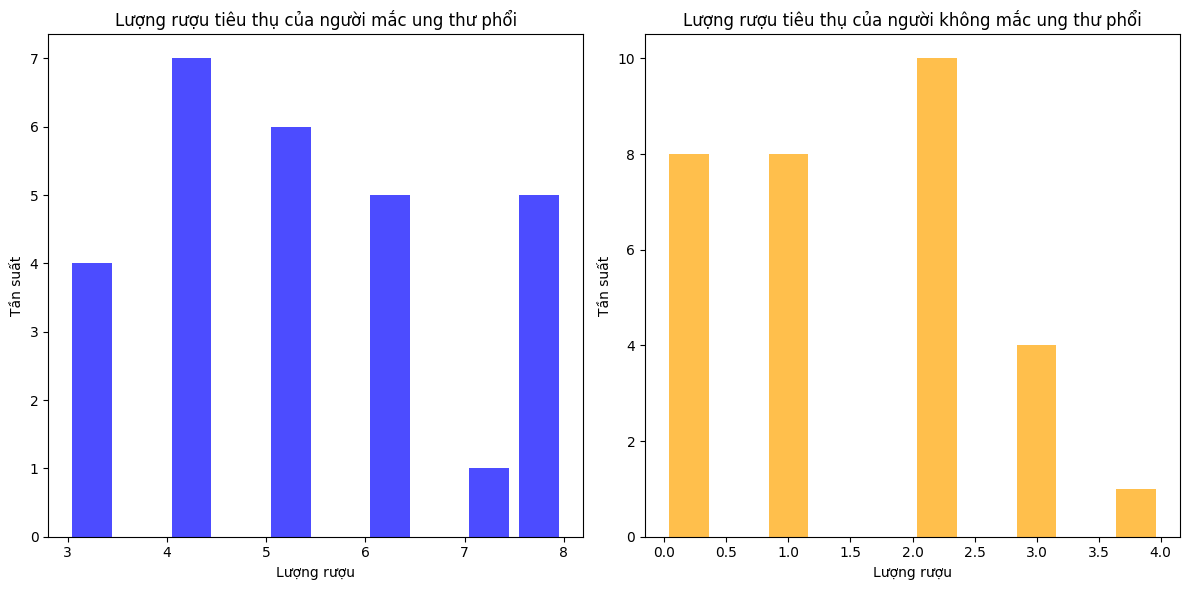

In [25]:
import matplotlib.pyplot as plt

# Tạo hàm vẽ histogram
def plot_histogram(ax, data, color, title, label):
    ax.hist(data, bins=10, alpha=0.7, color=color, rwidth=0.8)
    ax.set_title(title)
    ax.set_xlabel('Lượng rượu')
    ax.set_ylabel('Tần suất')

# Tạo subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Dữ liệu và thông số cho từng nhóm
datasets = [
    (d1['Alkhol'], 'blue', 'Lượng rượu tiêu thụ của người mắc ung thư phổi', 'Ung thư phổi'),
    (d0['Alkhol'], 'orange', 'Lượng rượu tiêu thụ của người không mắc ung thư phổi', 'Không ung thư phổi')
]

# Vẽ histogram cho từng nhóm
for ax, (data, color, title, label) in zip(axs, datasets):
    plot_histogram(ax, data, color, title, label)

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lấn
plt.show()


#### Dựa vào Histogram, ta có nhận xét
**Tính biến động của hai tập dữ liệu:** Cả hai tập dữ liệu đều có mức độ biến động tương tự nhau, với độ lệch chuẩn và phương sai cho thấy sự phân tán không lớn. Tuy nhiên, nhóm mắc bệnh ung thư phổi có mức độ biến động cao hơn với **IQR** (2) lớn hơn so với nhóm không mắc bệnh ung thư phổi (1.5).

**Tính đối xứng của hai tập dữ liệu:** Tính đối xứng của hai tập dữ liệu cũng tương tự nhau. Cả hai đều có độ lệch dương, cho thấy có một số giá trị cao hơn trung bình, nhưng sự lệch không quá mạnh. Độ bè nhọn của đỉnh dữ liệu của nhóm mắc bệnh ung thư phổi (**Kurtosis = 2.059723**) thấp hơn một chút so với nhóm không mắc bệnh ung thư phổi (**Kurtosis = 2.268528**), cho thấy phần lớn giá trị tập trung gần trung bình.

**Giá trị ngoại lệ:** Cả hai tập dữ liệu đều không có giá trị ngoại lệ đáng chú ý.

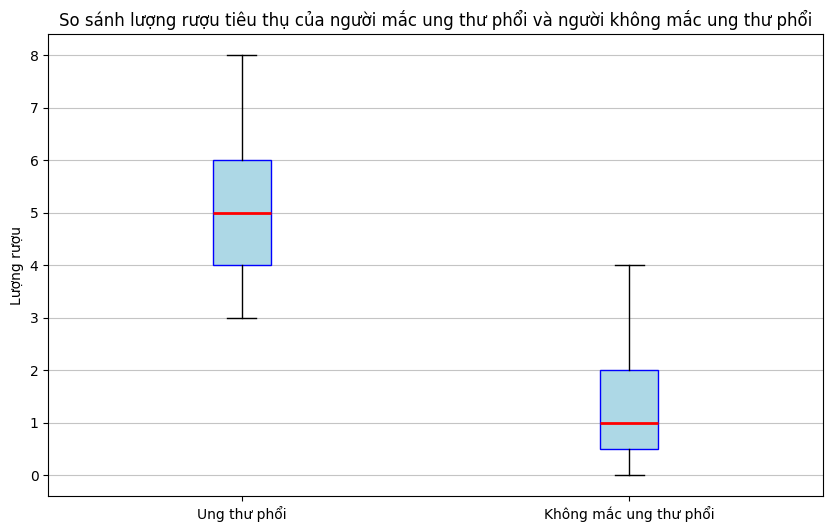

In [27]:
import matplotlib.pyplot as plt

# Tạo hàm vẽ boxplot
def create_boxplot(data_list, labels, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_list, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', edgecolor='blue', linewidth=1),  # Màu nền và màu viền
                medianprops=dict(color='red', linewidth=2))

    # Thêm tiêu đề và nhãn
    plt.title(title)
    plt.ylabel(ylabel)

    # Thiết lập nhãn cho trục x
    plt.xticks(range(1, len(labels) + 1), labels)

    # Thêm lưới cho biểu đồ
    plt.grid(axis='y', alpha=0.75)

    # Hiển thị biểu đồ
    plt.show()

# Dữ liệu cho boxplot
data = [d1['Alkhol'], d0['Alkhol']]
labels = ['Ung thư phổi', 'Không mắc ung thư phổi']

# Gọi hàm để tạo boxplot
create_boxplot(data, labels, title='So sánh lượng rượu tiêu thụ của người mắc ung thư phổi và người không mắc ung thư phổi', ylabel='Lượng rượu')


- **Khác biệt về vị trí:** Giá trị trung vị lượng rượu của trường hợp không mắc ung thư phổi nhỏ hơn so với trường hợp của người mắc ung thư phổi (1 và 5). Điều này cho thấy những người tiêu thụ lượng rượu cao hơn dễ có nguy cơ mắc ung thư phổi hơn.

- **Giá trị ngoại lệ:** Cả hai nhóm dữ liệu đều không có giá trị ngoại lệ đáng chú ý.

